# Homework 2 - Constructing & Analyzing Laplace Transforms for Reaction Networks

In this homework, you will construct a Laplace transform for a reaction network and predict its response to initial conditions.

The reaction network you will analyze is:

$S_1 \xrightarrow[\text{}]{k_1 S_1} S_2$,
$S_2 \xrightarrow[\text{}]{k_2 S_2} S_3$,
$S_3 \xrightarrow[\text{}]{k_3 S_3} S_2$,

In your computational studies, use $k_1 = 1$, $k_2 = 2$, $k_3 = 2.5$.
The initial conditions for $S_1 = 5$; all other species are initialized to 0.

You should submit your homework as a collab notebook with a separate section for each question.

**Questions**
1. (1 pt) Write Antimony code for the reaction network and simulate it under initial conditions.
1. (5 pt) Find the transfer function $G(s) = \frac{S_3(s)}{S_1 (s)}$. Show steps: (a) construct system equations; (b) convert to Laplace Transforms; and (c) calculate the transfer function.
You will get two points extra credit if you submit your work in LaTex.
1. (1 pt) What are the poles of $G(s)$? Is the system stable? Does it oscillate?
1. (3 pt) We can interpret the simulation in (1) as a response of the transfer function
to the input signal $S_1 (s) = \frac{5}{s + k_1}$. Show that the predicted value of $S_3$ at time
$\infty$ (the "final value") is consistent with the simulation in (1). (Hint: The final value of the Laplace transform $G(s)$
is $lim_{s\rightarrow \infty} s G(s)$.) Why is the final value less than the initial value of $S_1$?

# Preliminaries

In [1]:
!pip install -q tellurium
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tellurium as te

# Helpful Hints

## LaTex Basics

1. All LaTex appears between dollar signs (``$``)
1. Subscripts: $x_2$
1. Superscript: $x^2$
1. Summation: $\sum_{n=0}^{\infty} e^{nt}$
1. Derivatives: $\dot{x}(t)$
1. Bold: ${\bf A}$
1. Fractions: $\frac{a}{b}$

## Steps in Constructing Lapalce Transforms
1. Specify the input and output for the transfer function.
1. Write the system equations.
1. Convert to Laplace transforms.
1. Solve for the output LT in terms of the input LT and form the ratio.

# Q1: Write Antimony Code for the Reaction Network

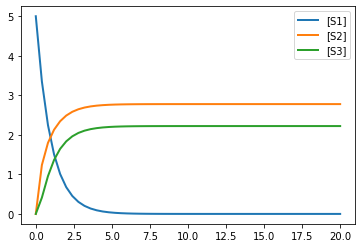

In [3]:
MODEL = """
J1: S1 -> S2; k1*S1
J2: S2 -> S3; k2*S2
J3: S3 -> S2; k3*S3
k1 = 1
k2 = 2
k3 = 2.5
k4 = 1
S1 = 5
S2 = 0
S3 = 0
"""
RR = te.loada(MODEL)
RR.simulate(0, 20)
RR.plot()

# Q2: Derive the transfer function $\frac{S_3(s)}{S_1(s)}$

## Write the system equations

\begin{eqnarray}
\dot{S}_1 & = & - k_1 S_1 \\
\dot{S}_2 & = &  k_1 S_1 - k_2 S_2 \\
\dot{S}_3 & = &  k_2 S_2 - k_3 S_3 \\
\end{eqnarray}

## Convert to Laplace Transforms

\begin{eqnarray}
s S_1 (s) & = & - k_1 S_1 (s) \\
s S_2 (s) & = &  k_1 S_1 (s) - k_2 S_2 (s) \\
s S_3 (s) & = &  k_2 S_2 (s) - k_3 S_3 (s) \\
\end{eqnarray}

## Solve for $\frac{S_3(s)}{S_1 (s)}$

\begin{eqnarray}
S_2(s)(s + k_2) & = & k_1 S_1(s) \\
S_2(s) & = & \frac{k_1 S_1}{s + k_2} \\
S_3 (s) (s + k_3) &=& k_2 \frac{k_1 S_1}{s + k_2} \\
\frac{S_3 (s)}{S_1 (s)} & = & \frac{k_1 k_2}{(s + k_2)(s + k_3)}
\end{eqnarray}

# Q3: Poles of the Transfer Function

The poles are $-k_2, -k_3$.
The system is stable and does not oscillate.

# Q4: Response to the Input Signal

For $U(s) = \frac{5}{s + k_1}$, we want to find the final (converged value of) $U(s) \frac{S_3 (s)}{S_1 (s)}$.
\begin{eqnarray}
lim_{s \rightarrow 0} U(s) \frac{S_3 (s)}{S_1 (s)} & = & lim_{s \rightarrow 0}\frac{1}{s + k_1} \frac{k_1 k_2}{(s + k_2)(s + k_3)} \\
& = & \frac{1}{k_1} \frac{k_1 k_2}{ k_2 k_3} \\
& = & \frac{1}{ k_3} \\
\end{eqnarray}

In our study, $k_3 = 2.5$ and so $\frac{5}{k_3} = 2$, which is where $S_3$ converges in the simulation.
This is less than $S_1$ at time 0 because of the reversible reaction that results in some of the
mass staying in $S_2$.